# DATA 558 Homework 2: Coding
#### Anushna Prakash
#### April 16th, 2021

### 3.2 Gradient Descent

The objective function for Ridge regression is:
$$
F(\beta) = \frac{1}{2n}\sum_{i=1}^n (y_i - x_i^\top \beta)^2 + \frac{\lambda}{n} ||\beta||_2^2,
$$

Assuming that $d=1$ and $n=1$, then the function can be written as:
$$
F(\beta) = \frac{1}{2}(y - x\beta)^2 + \lambda\beta^2
$$

The gradient $\nabla F$ of $F$ can be written as:
$$
\nabla F = -x(y - x\beta) + 2\lambda\beta
$$

Now assuming that $d>1$ and $n>1$ and using the linearity of differentiation, the gradient $\nabla F(\beta)$ of $F$ can be written as:
$$
\nabla F(\beta) = \frac{-1}{n} X(Y - X^\top\beta) + \frac{2}{n} \lambda\beta
$$

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
# Load the data
file = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(file, sep = ',', header = 0)
penguins = penguins.dropna()

In [3]:
# Create our X matrix with the predictors and y vector with the response
X = penguins.drop('body_mass_g', axis = 1)
X = pd.get_dummies(X, drop_first = True).to_numpy()
y = penguins['body_mass_g'].to_numpy()

Ridge regression requires data to be transformed into a standard scale. For each observation i in p features of X and the response variable y, we will take:
$$Z_{ip} = \frac{X_{ip} - \bar{X_{p}}}{\sigma(X_{p})}$$
or:
$$Z_{i} = \frac{y_{i} - \bar{y}}{\sigma(y)}$$

In [4]:
# Transform variables
X_transformed = preprocessing.StandardScaler().fit_transform(X)
y_transformed = preprocessing.scale(y)
# Divide the data into training and test sets. By default, 25% goes into the test set.
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, random_state = 0)

In [5]:
def computegrad(beta, lambda_, X, y):
    """
	Parameters
	----------
	beta : numpy.ndarray
		A numpy array of size (p+1,), where p is the number of predictors.
    lambda_ : float
        Regularization hyperparameter.
    X : numpy.ndarray
        A numpy array of size (n,p+1), containing the design matrix.
    y : numpy.ndarray
        A numpy array of size (n,), containing the responses.

	Returns
	-------
	grad : numpy.ndarray
		A numpy array of size (p+1,), containing the gradient dL/dbeta.
    """
    n = X.shape[0]
    resid = y - np.dot(X, beta)
    grad = -1/n * np.dot(np.transpose(X), resid) + 2/n * lambda_ * beta
    
    return grad

In [6]:
def graddescent(init_point, step_size, max_iterations, *args):
    """Gradient of g.

	Parameters
	----------
    init_point : numpy.ndarray
		A numpy array of size (p+1) where p is the number of predictors. 
        It is an initial starting point of betas to begin gradient descent.
    step_size : float
		Learning rate, or step size in optimization.
    max_iterations : int
		Maximum number of iterations to run GD.
    *args : lambda_, X, and Y

	Returns
	-------
	iterates : list[numpy.ndarray]
		A list of numpy arrays, each of size (d,), containing the iterates of GD.
	"""
    iters = 0 # initialize counter
    beta_iters = [init_point]
    gradient = computegrad(init_point, *args)
    beta = init_point
    
    while iters < max_iterations:
        beta = beta - step_size * gradient
        gradient = computegrad(beta, *args)
        beta_iters.append(beta)
        iters += 1
    
    return beta_iters

In [7]:
def objective_f(beta, lambda_, X, y):
    """Computes the objective function F(B) that is minimized by ridge regression.

	Parameters
	----------
    beta : numpy.ndarray
    lambda_ : float
    X : numpy.ndarray
    y : numpy array

	Returns
	-------
	f : float
		The value of the objective function evaluated using beta.
	"""
    n = X.shape[0]
    resid = y - np.dot(X, beta) 
    f = 1/(2*n) * np.linalg.norm(resid)**2 + lambda_/n * np.linalg.norm(beta)**2
    
    return f

Plot the # of iterations t against the objective function $F(\beta)$.
Assume $\lambda=-5$ and $\eta=0.5$.

In [8]:
lambda_ = -5
lr = 0.5
max_iters = 1000
beta_0 = np.zeros(X.shape[1])

grad_desc_betas = graddescent(beta_0, lr, max_iters, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

Text(0, 0.5, 'Ridge Function')

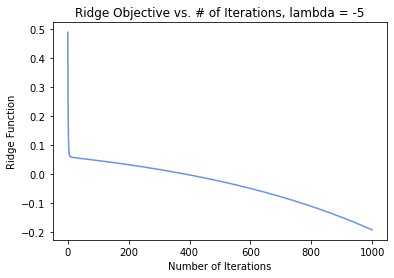

In [9]:
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = -5')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

Plot the # of iterations t against the objective function $F(\beta)$.
Assume $\lambda=.05$ and $\eta=0.5$.

In [10]:
lambda_ = .05
lr = 0.5
max_iters = 1000

grad_desc_betas = graddescent(beta_0, lr, max_iters, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

Text(0, 0.5, 'Ridge Function')

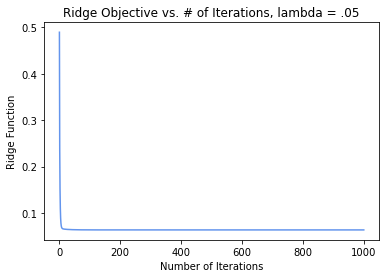

In [30]:
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = .05')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

$\beta_{T}$ is the final iteration of my implementation of the gradient descent algorithm. Compare this to $\beta*$, which is the scikit-learn implementation of the same method.

In [12]:
lambda_ = .05
lr = 0.5
max_iterations = 1000

beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ 0.10549178  0.10341777  0.28137878 -0.12087038  0.57945893 -0.00069895
 -0.03933048  0.26881073]
Beta*:  [ 1.05206260e-01  1.04185498e-01  2.80908980e-01 -1.20659310e-01
  5.81166361e-01 -3.02912785e-04 -3.91080891e-02  2.68852747e-01]
Beta_T - Beta*:  [ 2.85522933e-04 -7.67729372e-04  4.69804663e-04 -2.11066667e-04
 -1.70742575e-03 -3.96037389e-04 -2.22390010e-04 -4.20191366e-05]


The differences between my implementation and the scikit-learn implementation is small, with each $\beta$ being within $\pm0.002$.

Below I will experiment with different learning rates to approach scikit-learn, and show that there is no difference in coefficients even after doubling the number of iterations.

In [13]:
lambda_ = .05
lr = 0.5
max_iterations = 2000

beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ 0.10549178  0.10341777  0.28137878 -0.12087038  0.57945894 -0.00069895
 -0.03933048  0.26881073]
Beta*:  [ 1.05206260e-01  1.04185498e-01  2.80908980e-01 -1.20659310e-01
  5.81166361e-01 -3.02912785e-04 -3.91080891e-02  2.68852747e-01]
Beta_T - Beta*:  [ 2.85522716e-04 -7.67729032e-04  4.69804368e-04 -2.11066458e-04
 -1.70742492e-03 -3.96037299e-04 -2.22389929e-04 -4.20191169e-05]


I will also compare on $\lambda=-5$ with the same $\eta=0.5$ and 1000 iterations.

In [14]:
lambda_ = -5
lr = 0.5
max_iterations = 1000

beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [-2.17681645  3.72791254 -2.82468521  2.05672539  9.41406439  0.97663407
  0.83530056  0.46909392]
Beta*:  [ 0.01758883  0.25808985  0.16952169 -0.04499133  0.9369389   0.04894087
 -0.00135186  0.27456508]
Beta_T - Beta*:  [-2.19440528  3.4698227  -2.99420691  2.10171671  8.4771255   0.9276932
  0.83665242  0.19452884]


My implementation departs considerably from scikit-learn with negative $\lambda$.

In [15]:
lambda_ = -5
lr = 0.5
max_iterations = 2000

beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [-6.9579257  11.2346297  -9.36335652  6.65834542 27.82000976  2.96148806
  2.64359772  0.9043875 ]
Beta*:  [ 0.01758883  0.25808985  0.16952169 -0.04499133  0.9369389   0.04894087
 -0.00135186  0.27456508]
Beta_T - Beta*:  [-6.97551453 10.97653985 -9.53287822  6.70333674 26.88307087  2.91254719
  2.64494958  0.62982242]


The variance only increases as the number of iterations are increased.

In [23]:
etas = np.logspace(-3, 1)
max_iterations = 1000
lambda_ = .05
results = np.zeros((len(etas), 2))

for i, e in enumerate(etas):
    # Get optimal betas from gradient descent using varying learning rates
    b = graddescent(beta_0, e, max_iterations, lambda_, X_train, y_train)[-1]
    results[i, 0] = e
    results[i, 1] = objective_f(b, lambda_, X_train, y_train)

results_df = pd.DataFrame(results, columns = ['eta', 'f'])

Text(0, 0.5, 'Objective F value')

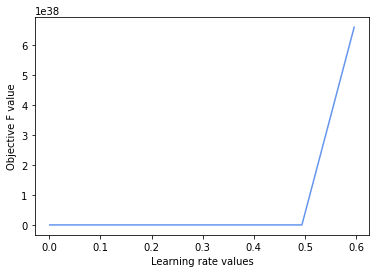

In [24]:
plt.plot(results_df['eta'], results_df['f'], color = "cornflowerblue")
plt.xlabel('Learning rate values')
plt.ylabel('Objective F value')

In [25]:
# Learning rate that minimizes objective function
min_eta = results_df['eta'][results_df['f'] == results_df['f'].min()].values
min_eta

array([0.49417134])

In [28]:
lambda_ = .05
lr = min_eta
max_iterations = 1000

beta_t = graddescent(beta_0, lr, max_iterations, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_
print("Beta_T - Beta*: ", (beta_t - beta_star))

f_t = objective_f(beta_t, lambda_, X_train, y_train)
f_star = objective_f(beta_star, lambda_, X_train, y_train)
print("F_T - F_star: ", (f_t - f_star))

Beta_T - Beta*:  [ 2.85522989e-04 -7.67729461e-04  4.69804741e-04 -2.11066721e-04
 -1.70742597e-03 -3.96037412e-04 -2.22390032e-04 -4.20191417e-05]
F_T - F_star:  -9.80794804122942e-08


My $\beta_{T}$ does not differ greatly from scikit-learn's $\beta*$. However, $F(\beta_{T}) < F(\beta*)$. This indicates that scikit-learn's implementation does not minimize the exact ridge function that my implementation minimizes, which is:
$$
F(\beta) = \frac{1}{2n}\sum_{i=1}^n (y_i - x_i^\top \beta)^2 + \frac{\lambda}{n} ||\beta||_2^2,
$$
It's possible that scikit-learn's ridge regression function is specified slightly differently. Or, it is also possible that scikit-learn assumes a different $\eta$ for the learning rate, one which is slightly different from the minimum I found.

Now I'll change the stopping criteria to be from number of iterations to be $\epsilon$-stationary condition, such that $||\nabla F(\beta)|| \leq \epsilon$.

In [29]:
def graddescent_e(init_point, step_size, tolerance, *args):
    """Gradient of g.

	Parameters
	----------
    init_point : numpy.ndarray
		A numpy array of size (p+1) where p is the number of predictors. 
        It is an initial starting point of betas to begin gradient descent.
    step_size : float
		Learning rate, or step size in optimization.
    tolerance : float
        Run gradient descent until gradient is less than or equal to tolerance.
    *args : lambda_, X, and Y

	Returns
	-------
	iterates : list[numpy.ndarray]
		A list of numpy arrays, each of size (d,), containing the iterates of GD.
	"""
    beta_iters = [init_point]
    gradient = computegrad(init_point, *args)
    beta = init_point
    
    while np.linalg.norm(gradient)**2 > tolerance:
        beta = beta - step_size * gradient
        gradient = computegrad(beta, *args)
        beta_iters.append(beta)
    
    return beta_iters

In [ ]:
## ** EDIT THIS BLOCK LATER **
lambda_ = .05
lr = 0.5
tolerance = .005

grad_desc_betas = graddescent_e(beta_0, lr, tolerance, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

# Create plots
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = 5')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

In [32]:
lambda_ = .05
lr = 0.5
tolerance = 0.005

beta_t = graddescent_e(beta_0, lr, tolerance, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_

print("Beta_T: ", beta_t)
print("Beta*: ", beta_star)
print("Beta_T - Beta*: ", (beta_t - beta_star))

Beta_T:  [ 0.16709522 -0.02390784  0.33234867 -0.15669235  0.30142591 -0.05868331
 -0.07916847  0.28659066]
Beta*:  [ 1.05206260e-01  1.04185498e-01  2.80908980e-01 -1.20659310e-01
  5.81166361e-01 -3.02912785e-04 -3.91080891e-02  2.68852747e-01]
Beta_T - Beta*:  [ 0.06188896 -0.12809333  0.05143969 -0.03603304 -0.27974045 -0.05838039
 -0.04006038  0.01773791]


Setting the tolerance $\epsilon = .005$ as the stopping condition leads to significantly different optimal betas between the two implementations.

Text(0, 0.5, 'Objective F value')

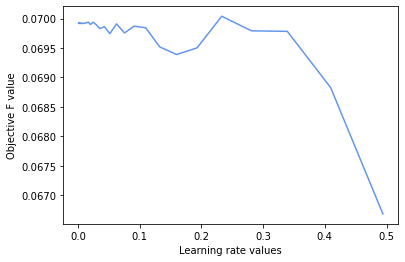

In [34]:
etas = np.logspace(-3, 1)
tolerance = .005
lambda_ = .05
results = np.zeros((len(etas), 2))

for i, e in enumerate(etas):
    # Get optimal betas from gradient descent using varying learning rates
    b = graddescent_e(beta_0, e, tolerance, lambda_, X_train, y_train)[-1]
    results[i, 0] = e
    results[i, 1] = objective_f(b, lambda_, X_train, y_train)

results_df = pd.DataFrame(results, columns = ['eta', 'f'])
min_eta = results_df['eta'][results_df['f'] == results_df['f'].min()].values

# Plot results
plt.plot(results_df['eta'], results_df['f'], color = "cornflowerblue")
plt.xlabel('Learning rate values')
plt.ylabel('Objective F value')

In [36]:
lambda_ = .05
lr = min_eta
tolerance = .005

beta_t = graddescent_e(beta_0, lr, tolerance, lambda_, X_train, y_train)[-1]
beta_star = Ridge(alpha = lambda_).fit(X_train, y_train).coef_
print("Beta_T - Beta*: ", (beta_t - beta_star))

f_t = objective_f(beta_t, lambda_, X_train, y_train)
f_star = objective_f(beta_star, lambda_, X_train, y_train)
print("F_T - F_star: ", (f_t - f_star))

Beta_T - Beta*:  [ 0.07016108 -0.14765944  0.06285419 -0.04297117 -0.26982722 -0.07618848
 -0.04541918  0.01722113]
F_T - F_star:  0.0030583034503569445


Using the version of descent with the stopping condition set to $\epsilon=.005$ performs worse at minimization of the objective function compared to scikit-learn's implementation.

In [39]:
print("F_T: ", f_t)
print("F_star: ", f_star)
print("F_T - F_star: ", (f_t - f_star))

F_T:  0.06668230924189948
F_star:  0.06362400579154254
F_T - F_star:  0.0030583034503569445
